In [10]:
import pandas as pd 
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt 
import seaborn as sns

sns.set()

In [11]:
data_path = "../data/experiment_results.csv"
data = pd.read_csv(data_path)

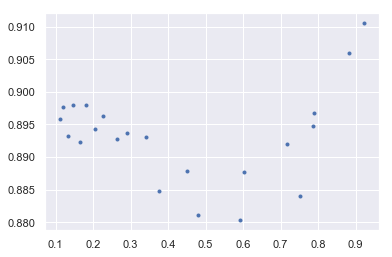

In [20]:
plt.plot(data["corr_data_correlation_mean"], data["model_roc_auc"], ".b")

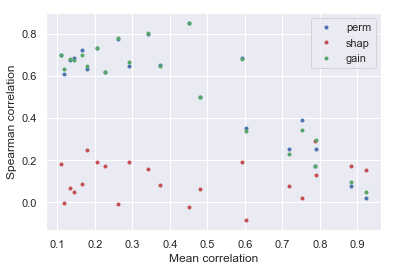

In [16]:
plt.plot(data["corr_data_abs_correlation_mean"], data["permutation_ranks_corr"], ".b", label="perm")
plt.plot(data["corr_data_abs_correlation_mean"], data["shap_ranks_corr"], ".r", label="shap")
plt.plot(data["corr_data_abs_correlation_mean"], data["gain_ranks_corr"], ".g", label="gain")

plt.xlabel("Mean correlation")
plt.ylabel("Spearman correlation")
plt.legend()

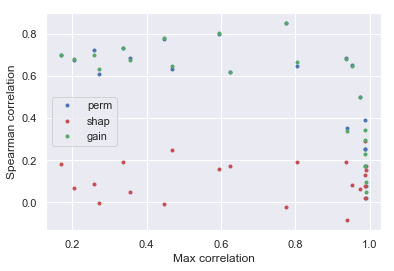

In [17]:
plt.plot(data["corr_data_abs_correlation_max"], data["permutation_ranks_corr"], ".b", label="perm")
plt.plot(data["corr_data_abs_correlation_max"], data["shap_ranks_corr"], ".r", label="shap")
plt.plot(data["corr_data_abs_correlation_max"], data["gain_ranks_corr"], ".g", label="gain")

plt.xlabel("Max correlation")
plt.ylabel("Spearman correlation")
plt.legend()

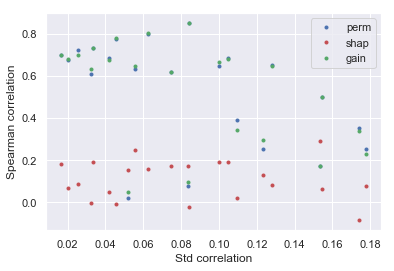

In [19]:
plt.plot(data["corr_data_abs_correlation_std"], data["permutation_ranks_corr"], ".b", label="perm")
plt.plot(data["corr_data_abs_correlation_std"], data["shap_ranks_corr"], ".r", label="shap")
plt.plot(data["corr_data_abs_correlation_std"], data["gain_ranks_corr"], ".g", label="gain")

plt.xlabel("Std correlation")
plt.ylabel("Spearman correlation")
plt.legend()